In [1]:
from Model2 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import copy
import matplotlib.lines as mlines

c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()
initial_model_state = copy.deepcopy(model) 

pos = nx.spring_layout(model.G)

for j in range(300):
    model.step()

10 start number
0.4 op step  12
0.3 op step  24
0.1 op step  36
0.0 op step  48
0.0 op step  60
0.0 op step  72
0.0 op step  84
0.0 op step  96
0.0 op step  108
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
0.0 op step  120
shock is happening!!
This farm failed due to antibiotic use
This farm failed due to antibiotic use
0.0 op step  132
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
0.0 op step  144
This farm failed due to antibiotic use
This farm failed due to antibiotic use
0.0 op step  156
This farm

In [3]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data = agent_data.xs(288, level="Step")
#agent_data = agent_data[agent_data["Agent_type"] == "Agri_small_saline"]
agent_data = agent_data[agent_data['Agent_type'] != "migrated"]
agent_data

,Agent_type,Age,Salinity,Savings,Loan_size,maximum_debt,income,abilities,current_crop,New crop
AgentID,,,,,,,,,,
112,Aqua_small_saline,"[4, 5, 33, 36, 40, 68, 68]",10.709868,-75049.258973,0.0,8199.781285,2629.869812,None,Shrimp,None
119,Aqua_small_saline,"[10, 31, 34, 58, 62]",7.259933,73335.481458,0.0,6326.206884,6228.156053,None,Shrimp,None
129,Aqua_small_saline,"[0, 29, 51, 53, 76]",5.624313,-45149.958255,0.0,7479.520352,2174.879010,None,Shrimp,None
139,Aqua_small_saline,"[21, 23, 54, 56]",9.702366,89070.009094,0.0,8837.169087,3335.063178,None,Shrimp,None
144,Aqua_small_saline,"[5, 30, 35, 55, 60]",7.292470,-137892.576204,0.0,5829.759094,1793.605547,None,Shrimp,None


### PLOT AGENTS ON THE MAP

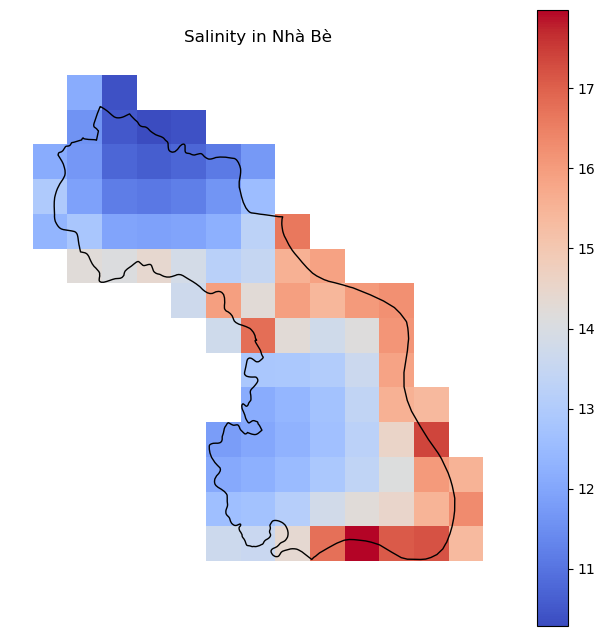

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
model.polygon_districts.boundary.plot(ax=ax, color='black', linewidth=1)
model.data_salinity.plot(ax=ax, column="Salinity", cmap="coolwarm", legend=True)
plt.title(f"Salinity in {model.district}")
plt.axis("off")
plt.show()

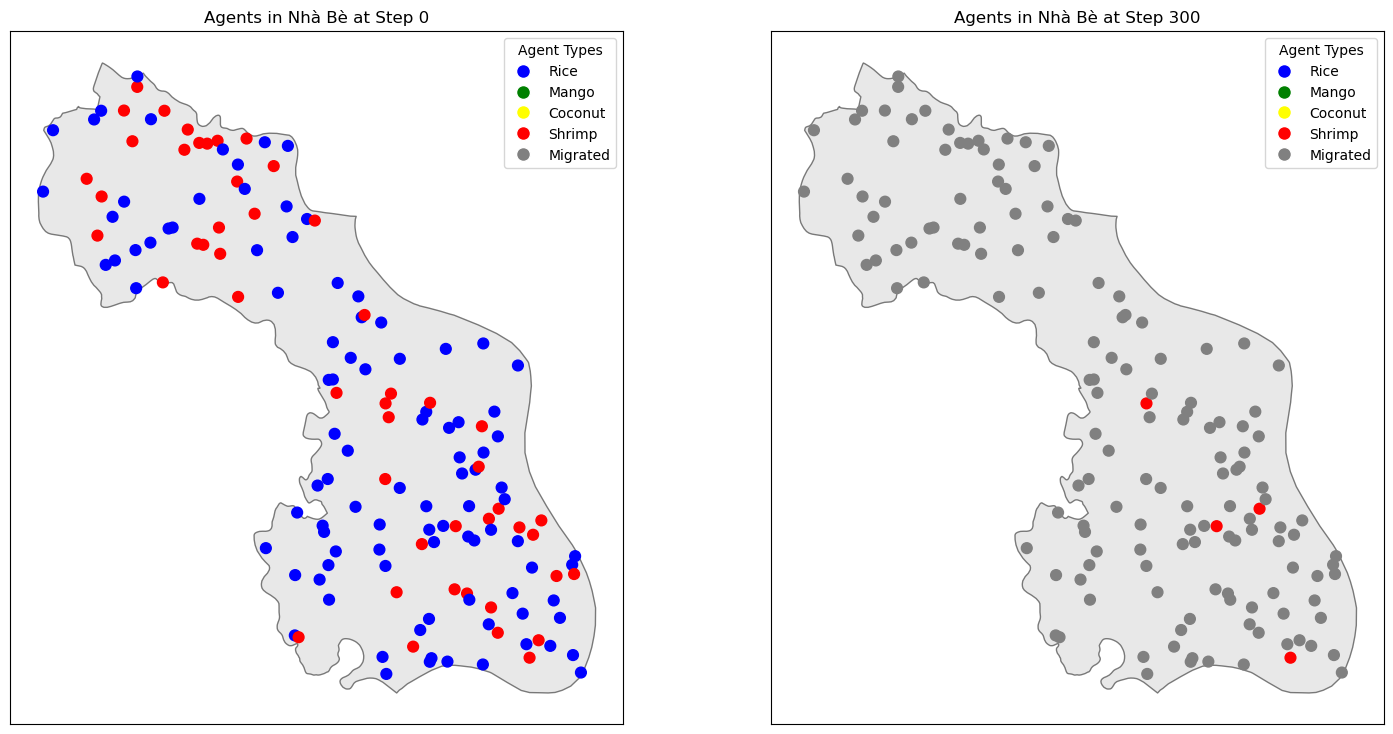

In [5]:
from Model2 import Agri_farmer, Aqua_farmer

def plot_network(ax, model):
    ax.clear()

    # Plot district map
    model.polygon_districts.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get node positions
    pos = nx.get_node_attributes(model.G, 'pos')

    # Map node_id to agent
    node_to_agent = {
        agent.node_id: agent
        for agent in model.agents
        if isinstance(agent, (Agri_farmer, Aqua_farmer))
    }

    # Prepare lists for nodes and their colors
    nodes_to_draw = []
    colors_to_draw = []

    for node_id in model.G.nodes():
        nodes_to_draw.append(node_id)
        agent = node_to_agent.get(node_id)
        if agent:
            if agent.current_crop == "Rice":
                colors_to_draw.append('blue')
            elif agent.current_crop == "Mango":
                colors_to_draw.append('green')
            elif agent.current_crop == "Coconut":
                colors_to_draw.append('yellow')
            elif agent.current_crop == "Shrimp":
                colors_to_draw.append('red')
            else:
                colors_to_draw.append("gray")  # unknown crop
        else:
            colors_to_draw.append("gray")  # migrated / no agent

    # Draw edges first (optional)
    #nx.draw_networkx_edges(model.G, pos, ax=ax, edge_color="gray")

    # Draw nodes with matching colors
    nx.draw_networkx_nodes(model.G, pos,
                           nodelist=nodes_to_draw,
                           node_color=colors_to_draw,
                           node_size=60,
                           ax=ax)

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Rice')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Mango')
    yellow_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Coconut')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Shrimp')
    grey_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Migrated')
    ax.legend(handles=[blue_patch, green_patch, yellow_patch, red_patch, grey_patch], loc='upper right', title='Agent Types')

    ax.set_title(f"Agents in {model.district} at Step {model.steps}", fontsize=12)

    # Call function above to plot the map
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 9))
plot_network(ax1, initial_model_state)
plot_network(ax2, model)
plt.show()
